In [1]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.txt to netflix_titles.txt


In [9]:
import pandas as pd
import io
import matplotlib.pyplot as plt
from prettytable import PrettyTable

# Read the uploaded file into a DataFrame
df = pd.read_csv(io.BytesIO(uploaded['netflix_titles.txt']))

# Check for missing data and deal with them
print(df.isnull().sum()) 

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [16]:
# Convert 'date_added' to datetime type
df['date_added'] = pd.to_datetime(df['date_added'])

# Create the new columns
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

print(df.dtypes)

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added             float64
month_added            float64
dtype: object


In [7]:
# Fill missing values with -1 (indicating missing data)
df['year_added'].fillna(-1, inplace=True)
df['month_added'].fillna(-1, inplace=True)

# Convert columns to integers
df['year_added'] = df['year_added'].astype(int)
df['month_added'] = df['month_added'].astype(int)

In [8]:
# What is the most popular release year for movies on Netflix?
# What year did Netflix add the most content to its platform?
# What is the movie with the longest title in the dataset?

popular_release_year = df[df['type'] == 'Movie']['release_year'].value_counts().idxmax()
most_content_year = df['year_added'].value_counts().idxmax()
longest_title_movie = df[df['type'] == 'Movie']['title'].str.len().idxmax()

# Specify the Column Names while initializing the Table
summary_table = PrettyTable(["Information", "Result"])

# Add rows
summary_table.add_row(["Most popular release year for movies", popular_release_year])
summary_table.add_row(["Year when Netflix added the most content", most_content_year])
summary_table.add_row(["Movie with the longest title", df.loc[longest_title_movie, 'title']])

print(summary_table)

+------------------------------------------+----------------------------------------------------------------------------------------------------------+
|               Information                |                                                  Result                                                  |
+------------------------------------------+----------------------------------------------------------------------------------------------------------+
|   Most popular release year for movies   |                                                   2017                                                   |
| Year when Netflix added the most content |                                                   2019                                                   |
|       Movie with the longest title       | Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton |
+------------------------------------------+--------------------------------------------

In [14]:
# What are the top 5 most popular movie genres?
# Create a DataFrame of the top 5 most popular movie genres.
genres_df = pd.DataFrame(df[df['type'] == 'Movie']['listed_in'].str.split(', ', expand=True).stack().value_counts().nlargest(5), columns=['Count'])
genres_df = genres_df.reset_index()
genres_df.rename(columns = {'index':'Genre'}, inplace = True)

# Initialize the PrettyTable
genres_table = PrettyTable(["Genre", "Count"])

# Add rows to the table using a for loop
for index, value in genres_df.iterrows():
    genres_table.add_row([value['Genre'], value['Count']])

print("The top 5 most popular movie genres are:")
print(genres_table)

The top 5 most popular movie genres are:
+----------------------+-------+
|        Genre         | Count |
+----------------------+-------+
| International Movies |  2752 |
|        Dramas        |  2427 |
|       Comedies       |  1674 |
|    Documentaries     |  869  |
|  Action & Adventure  |  859  |
+----------------------+-------+


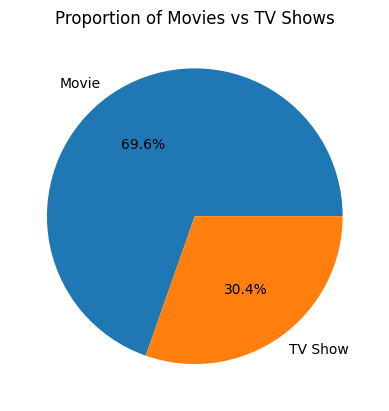

In [15]:
# Create a pie chart visualizing the proportion of movies vs TV shows. Label each section with the percentage.
content_type_counts = df['type'].value_counts()
plt.pie(content_type_counts, labels = content_type_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Movies vs TV Shows')
plt.show()